In [45]:
# Upload required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova

In [46]:
# Upload data file
df_score = pd.read_csv('INF2178_A3_data.csv')
df_score.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


# Data Cleaning

In [47]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [48]:
# Changing the data type of incomegroup  from int to categorical
df_score['incomegroup'] = df_score['incomegroup'].astype('category')

In [49]:
# Drop the unnecessary columns
df_score = df_score.drop(columns=['totalhouseholdincome','incomeinthousands'])
df_score

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,3
1,50.82,44.44,38.147,83.50,58.93,37.409,3
2,40.68,28.57,28.108,40.41,32.81,29.312,3
3,32.57,23.57,15.404,34.14,35.25,27.382,2
4,31.98,19.65,18.727,32.84,23.60,26.977,2
...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,1
11929,31.96,25.73,21.461,47.84,40.35,32.357,1
11930,40.44,30.50,16.836,49.93,41.00,19.803,2
11931,35.51,28.96,28.864,51.60,50.27,35.991,1


In [50]:
# Check missing value
df_score.isnull().sum()

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
incomegroup                    0
dtype: int64

# EDA


In [51]:
 # Get the summary statistics
 df_score.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000


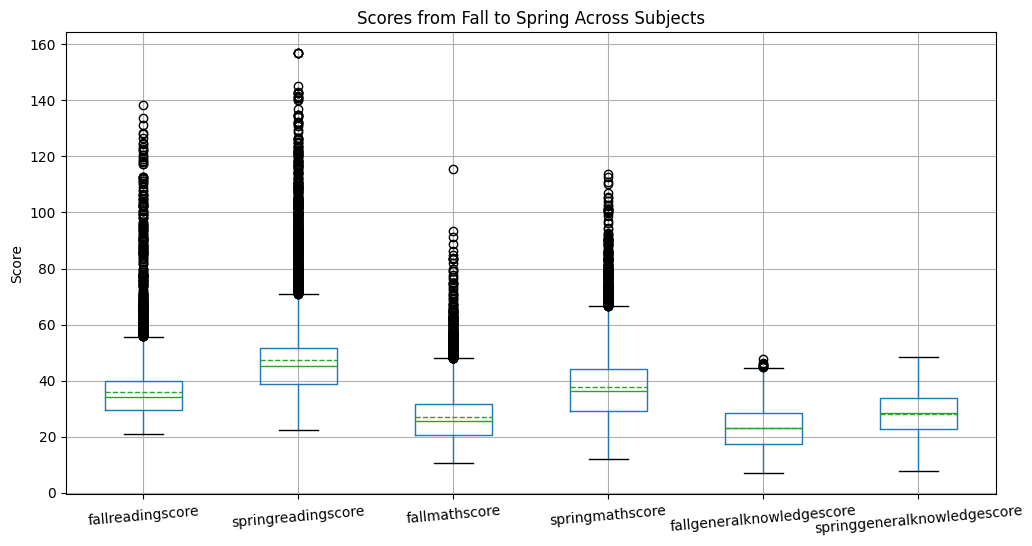

In [52]:
# Boxplot for the score in different subjects from sping and fall
plt.figure(figsize=(12, 6))

df_score.boxplot(column=['fallreadingscore', 'springreadingscore', 'fallmathscore', 'springmathscore',
                 'fallgeneralknowledgescore', 'springgeneralknowledgescore'],showmeans = True, meanline = True)

plt.title('Scores from Fall to Spring Across Subjects')
plt.ylabel('Score')
plt.xticks(rotation=5)
plt.show()

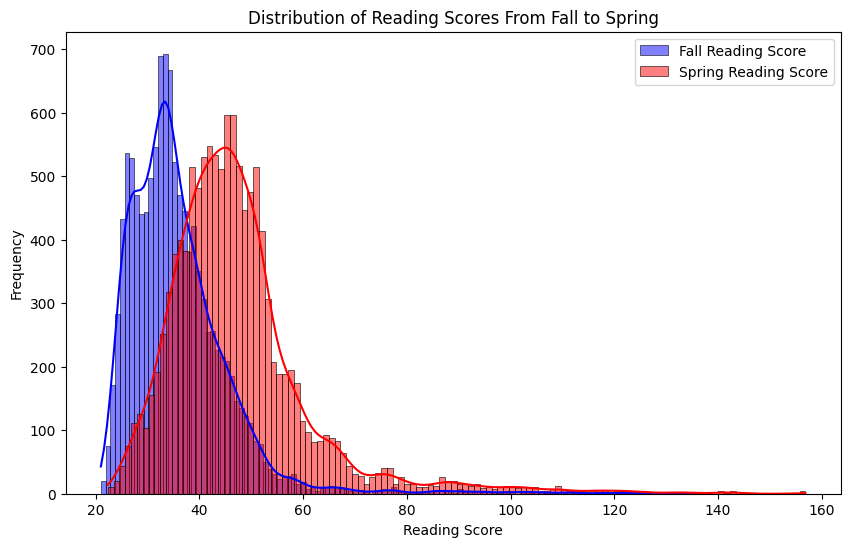

In [53]:
# Distribution of students' reading scores from fall to spring
plt.figure(figsize=(10, 6))
sns.histplot(df_score['fallreadingscore'], color='blue', label='Fall Reading Score', kde=True)
sns.histplot(df_score['springreadingscore'], color='red', label='Spring Reading Score', kde=True)
plt.title('Distribution of Reading Scores From Fall to Spring')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

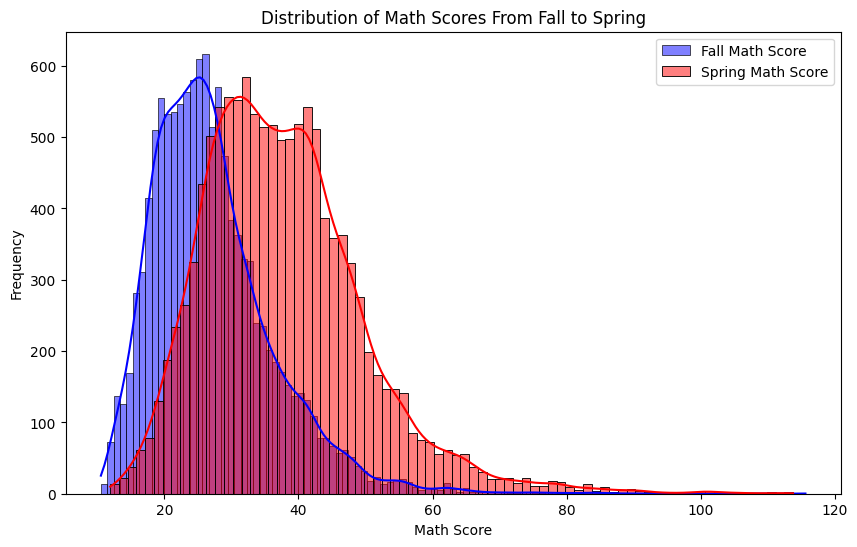

In [54]:
# Distribution of students' math scores from fall to spring
plt.figure(figsize=(10, 6))
sns.histplot(df_score['fallmathscore'], color='blue', label='Fall Math Score', kde=True)
sns.histplot(df_score['springmathscore'], color='red', label='Spring Math Score', kde=True)
plt.title('Distribution of Math Scores From Fall to Spring')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

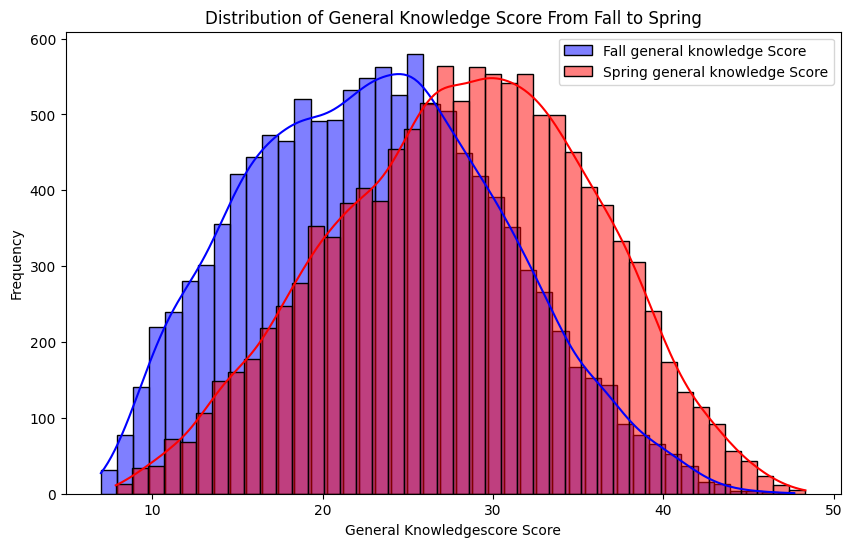

In [55]:
# Distribution of students' general knowledge scores from fall to spring
plt.figure(figsize=(10, 6))
sns.histplot(df_score['fallgeneralknowledgescore'], color='blue', label='Fall general knowledge Score', kde=True)
sns.histplot(df_score['springgeneralknowledgescore'], color='red', label='Spring general knowledge Score', kde=True)
plt.title('Distribution of General Knowledge Score From Fall to Spring')
plt.xlabel('General Knowledgescore Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Research Question 1: How does income group affect students' reading scores in the spring, after controlling for their reading scores in the fall?

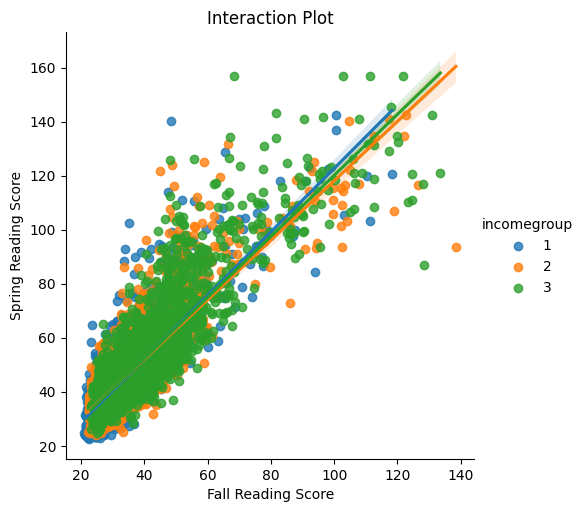

In [56]:
# create the interaction plot for reading scores in Spring and Fall terms by Income Group
sns.lmplot(x='fallreadingscore',y='springreadingscore',hue='incomegroup',data=df_score)
# set the xy labels and title
plt.xlabel('Fall Reading Score')
plt.ylabel('Spring Reading Score')
plt.title('Interaction Plot')
# show the plot
plt.show()

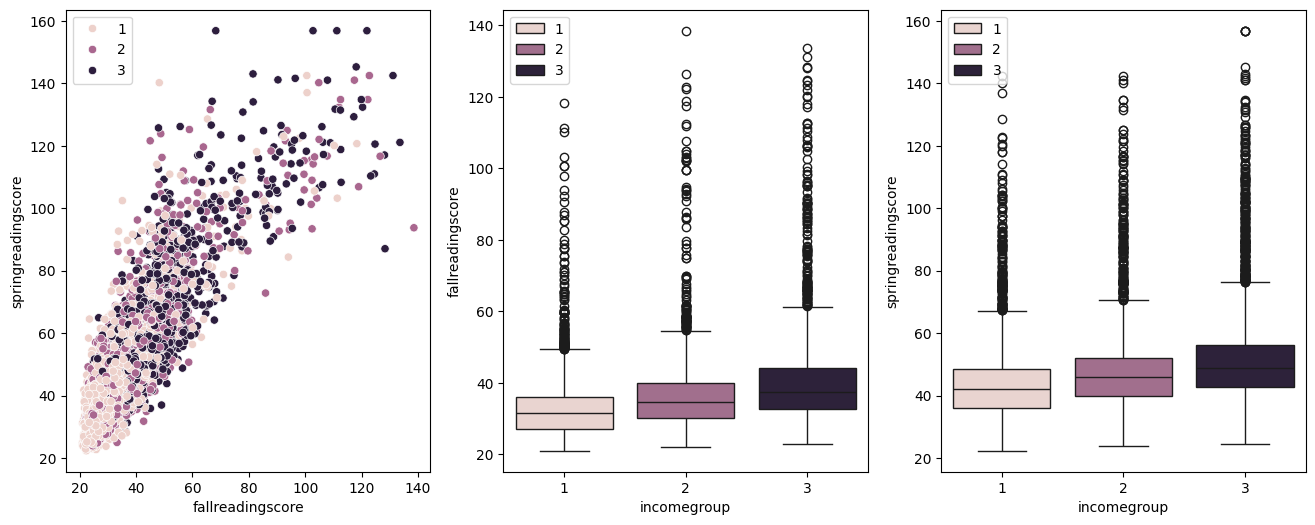

In [57]:
fig, axs = plt.subplots(ncols=3,figsize=(16, 6))
# Scatterplot of reading score in fall and spring for students in kindergarten by income group
sns.scatterplot(data=df_score, x="fallreadingscore", y="springreadingscore", hue=df_score.incomegroup.tolist(), ax=axs[0])
# Boxplot of fall reading score by income group
sns.boxplot(data=df_score, x="incomegroup", y="fallreadingscore", hue=df_score.incomegroup.tolist(), ax=axs[1])
# Boxplot of spring reading score by income group
sns.boxplot(data=df_score, x="incomegroup", y="springreadingscore", hue=df_score.incomegroup.tolist(), ax=axs[2])
plt.show()

In [58]:
# Ancova for readingscore~incoemgroup
ancova(data=df_score, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,5.131201e+02,2,4.055660,0.017348,0.00068
1,fallreadingscore,1.547042e+06,1,24455.397576,0.000000,0.67214
2,Residual,7.546256e+05,11929,NaN,NaN,NaN


In [59]:
# Fit the ANCOVA model
model = sm.formula.ols('springreadingscore ~ fallreadingscore + C(incomegroup)', data=df_score).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8929.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:19:14   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5430    

In [60]:
# Fit the ANCOVA model with interaction term
model_interaction = sm.formula.ols('springreadingscore ~ fallreadingscore * C(incomegroup)', data=df_score).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     5367.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:19:14   Log-Likelihood:                -41667.
No. Observations:               11933   AIC:                         8.335e+04
Df Residuals:                   11927   BIC:                         8.339e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


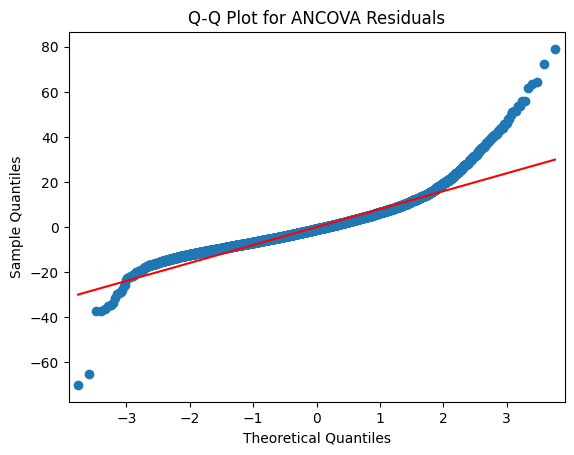

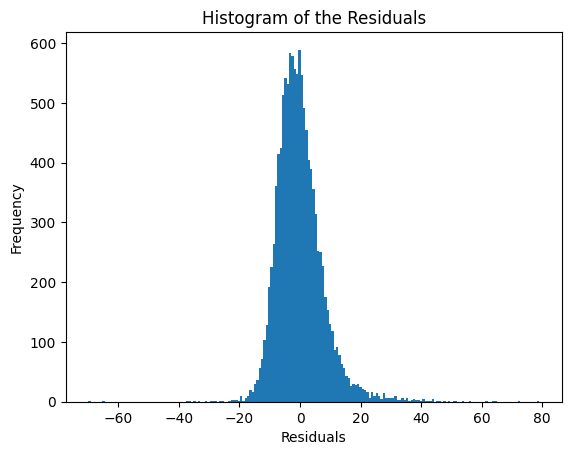

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9119972586631775, pvalue=0.0)

In [61]:
# Assuption 1 Normality of residuals

# Q-Q plot of the residuals
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for ANCOVA Residuals')
plt.show()

# Histogram of the residuals
plt.figure()
plt.hist(model.resid, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of the Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
shapiro_test

In [62]:
# Assuption 2: Homogeneity of variances

# Levene's test if the sample data is not normal distribution
res = stat()
res.levene(df=df_score, res_var='springreadingscore', xfac_var='incomegroup')
print(res.levene_summary)

                 Parameter    Value
0      Test statistics (W)  39.5528
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0000


# Research Question 2: How does income group affect students' math scores in the spring, after controlling for their math scores in the fall?

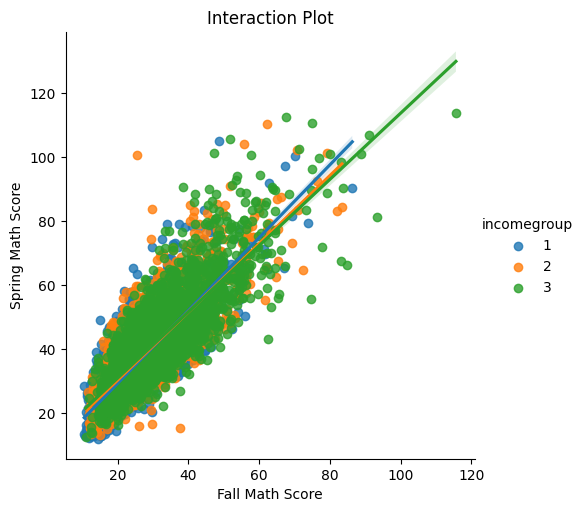

In [63]:
# create the interaction plot for math scores in Spring and Fall terms by Income Group
sns.lmplot(x='fallmathscore',y='springmathscore',hue='incomegroup',data=df_score)
# set the xy labels and title
plt.xlabel('Fall Math Score')
plt.ylabel('Spring Math Score')
plt.title('Interaction Plot')
# show the plot
plt.show()

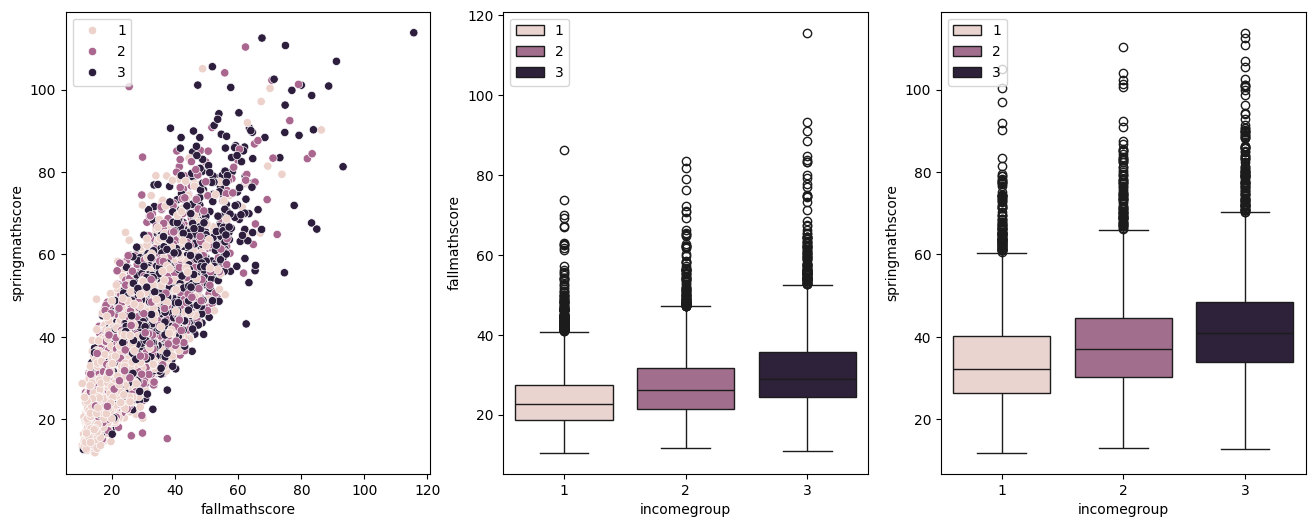

In [64]:
fig, axs = plt.subplots(ncols=3,figsize=(16, 6))
# Scatterplot of math score in fall and spring for students in kindergarten by income group
sns.scatterplot(data=df_score, x="fallmathscore", y="springmathscore", hue=df_score.incomegroup.tolist(), ax=axs[0])
# Boxplot of fall math score by income group
sns.boxplot(data=df_score, x="incomegroup", y="fallmathscore", hue=df_score.incomegroup.tolist(), ax=axs[1])
# Boxplot of spring math score by income group
sns.boxplot(data=df_score, x="incomegroup", y="springmathscore", hue=df_score.incomegroup.tolist(), ax=axs[2])
plt.show()

In [65]:
# Ancova for mathscore~incoemgroup
ancova(data=df_score, dv='springmathscore', covar='fallmathscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,fallmathscore,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


In [66]:
# Fit the ANCOVA model
model = sm.formula.ols('springmathscore ~ fallmathscore + C(incomegroup)', data=df_score).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:19:18   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011    

In [67]:
# Fit the ANCOVA model with interaction term
model_interaction = sm.formula.ols('springmathscore ~ fallmathscore * C(incomegroup)', data=df_score).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     5103.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:19:19   Log-Likelihood:                -39786.
No. Observations:               11933   AIC:                         7.958e+04
Df Residuals:                   11927   BIC:                         7.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

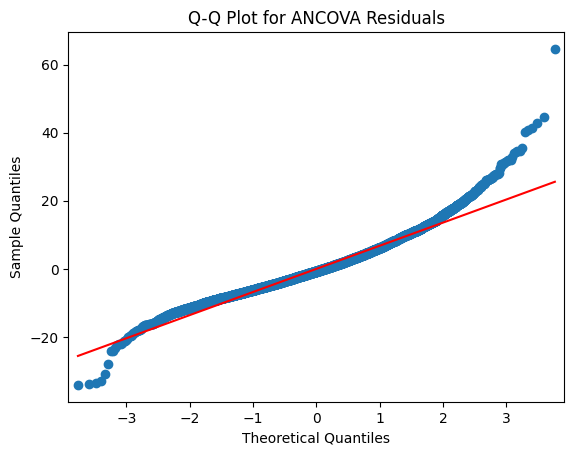

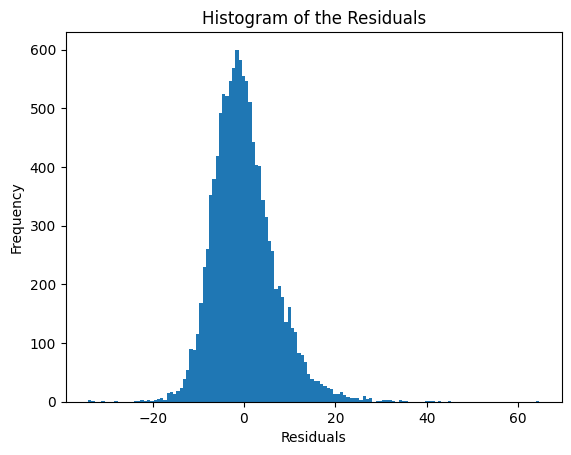

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9649319052696228, pvalue=0.0)

In [68]:
# Assuption 1 Normality of residuals

# Q-Q plot of the residuals
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for ANCOVA Residuals')
plt.show()

# Histogram of the residuals
plt.figure()
plt.hist(model.resid, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of the Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
shapiro_test

In [69]:
# Assuption 2: Homogeneity of variances

# Levene's test if the sample data is not normal distribution
res = stat()
res.levene(df=df_score, res_var='springmathscore', xfac_var='incomegroup')
print(res.levene_summary)

                 Parameter    Value
0      Test statistics (W)  18.8999
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0000


# Research Question 3: How does income group affect students' general knowledge scores in the spring, after controlling for their general knowledge scores in the fall?

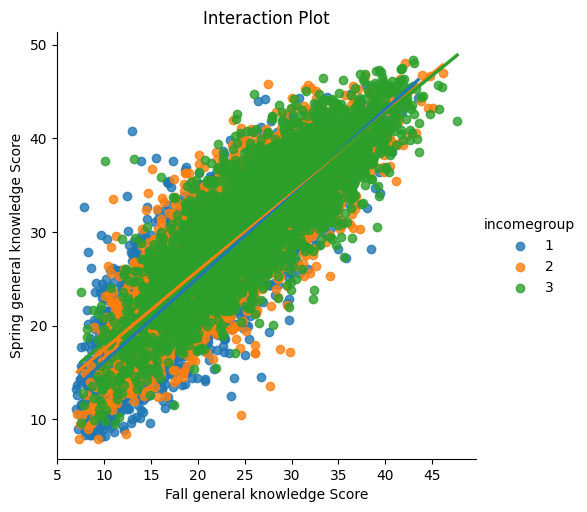

In [70]:
# create the interaction plot for general knowledge scores in Spring and Fall terms by Income Group
sns.lmplot(x='fallgeneralknowledgescore',y='springgeneralknowledgescore',hue='incomegroup',data=df_score)
# set the xy labels and title
plt.xlabel('Fall general knowledge Score')
plt.ylabel('Spring general knowledge Score')
plt.title('Interaction Plot')
# show the plot
plt.show()

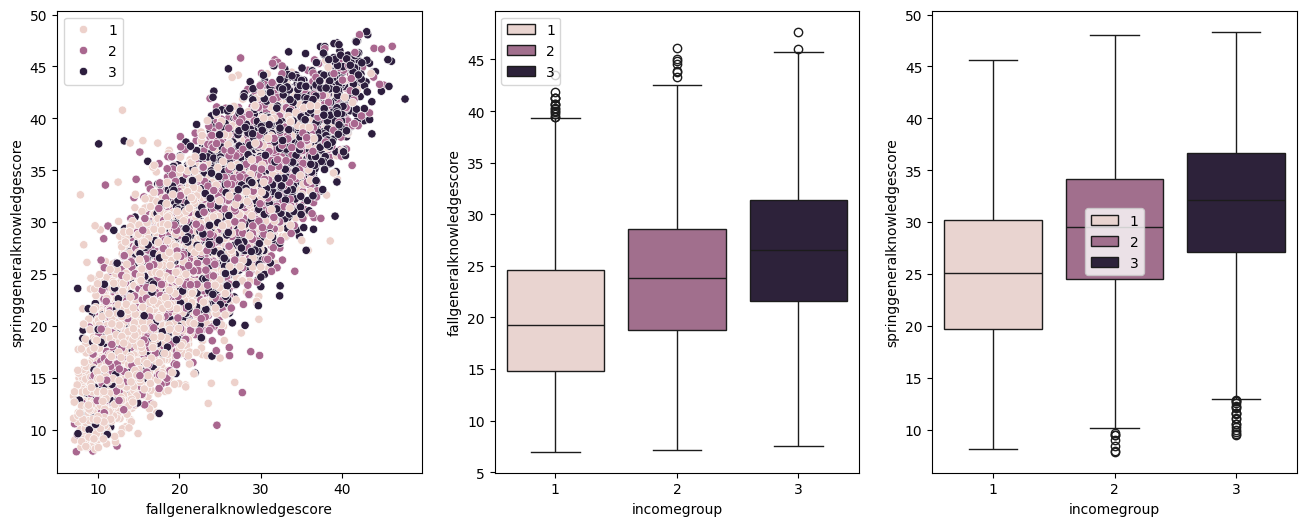

In [71]:
fig, axs = plt.subplots(ncols=3,figsize=(16, 6))
# Scatterplot of General Knowledge score in fall and spring for students in kindergarten by income group
sns.scatterplot(data=df_score, x="fallgeneralknowledgescore", y="springgeneralknowledgescore", hue=df_score.incomegroup.tolist(), ax=axs[0])
# Boxplot of fall General Knowledge  score by income group
sns.boxplot(data=df_score, x="incomegroup", y="fallgeneralknowledgescore", hue=df_score.incomegroup.tolist(), ax=axs[1])
# Boxplot of spring General Knowledge  score by income group
sns.boxplot(data=df_score, x="incomegroup", y="springgeneralknowledgescore", hue=df_score.incomegroup.tolist(), ax=axs[2])
plt.show()

In [72]:
# Ancova for generalknowledgescore~incoemgroup
ancova(data=df_score, dv='springgeneralknowledgescore', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1756.904469,2,56.908040,2.525291e-25,0.009451
1,fallgeneralknowledgescore,411876.768316,1,26682.269841,0.000000e+00,0.691049
2,Residual,184140.179925,11929,NaN,NaN,NaN


In [73]:
# Fit the ANCOVA model
model = sm.formula.ols('springgeneralknowledgescore ~ fallgeneralknowledgescore + C(incomegroup)', data=df_score).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.082e+04
Date:                         Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                                 20:19:24   Log-Likelihood:                -33259.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11929   BIC:                         6.656e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [74]:
# Fit the ANCOVA model with interaction term
model_interaction = sm.formula.ols('springgeneralknowledgescore ~ fallgeneralknowledgescore * C(incomegroup)', data=df_score).fit()
print(model_interaction.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.732
Model:                                     OLS   Adj. R-squared:                  0.732
Method:                          Least Squares   F-statistic:                     6524.
Date:                         Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                                 20:19:24   Log-Likelihood:                -33236.
No. Observations:                        11933   AIC:                         6.648e+04
Df Residuals:                            11927   BIC:                         6.653e+04
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------

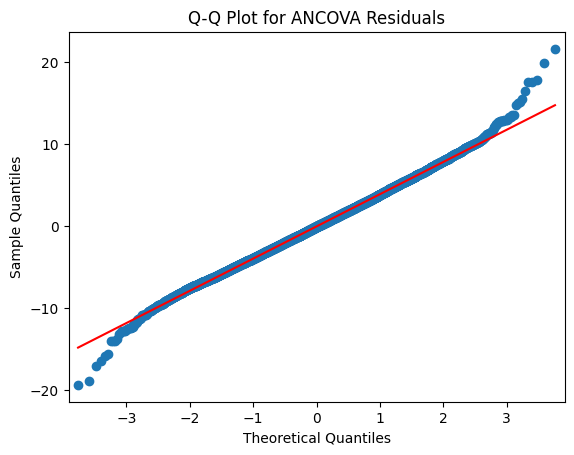

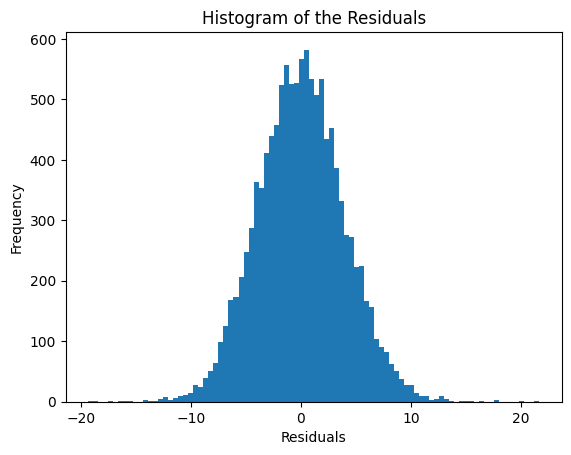

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9980394840240479, pvalue=3.155014791089705e-11)

In [75]:
# Assuption 1 Normality of residuals

# Q-Q plot of the residuals
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for ANCOVA Residuals')
plt.show()

# Histogram of the residuals
plt.figure()
plt.hist(model.resid, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of the Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
shapiro_test

In [76]:
# Assuption 2: Homogeneity of variances

# Levene's test if the sample data is not normal distribution
res = stat()
res.levene(df=df_score, res_var='springgeneralknowledgescore', xfac_var='incomegroup')
print(res.levene_summary)

                 Parameter   Value
0      Test statistics (W)  9.4058
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0001
